<a href="https://colab.research.google.com/github/DainoJung/LG-Aimers-6th/blob/main/Infertility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1-1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏

In [53]:
# 1. ÎÇòÎàî Ìè∞Ìä∏ ÏÑ§Ïπò
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# 2. Ìè∞Ìä∏ Îß§ÎãàÏ†Ä ÏóÖÎç∞Ïù¥Ìä∏ Î∞è Matplotlib Ïû¨ÏÑ§Ï†ï
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# Ìè∞Ìä∏ Îß§ÎãàÏ†ÄÏóê Ï∂îÍ∞Ä
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨

from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [115]:
from google.colab import drive
drive.mount('/content/drive')
test = pd.read_csv('/content/drive/My Drive/AI/LG Aimers/Data/test.csv').drop(columns=['ID'])
train = pd.read_csv('/content/drive/My Drive/AI/LG Aimers/Data/train.csv').drop(columns=['ID'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú               256351 non-null  object 
 1   ÏãúÏà† ÎãπÏãú ÎÇòÏù¥               256351 non-null  object 
 2   ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò  9370 non-null    float64
 3   ÏãúÏà† Ïú†Ìòï                  256351 non-null  object 
 4   ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï               256349 non-null  object 
 5   Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä               256351 non-null  int64  
 6   Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï               256351 non-null  object 
 7   Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä            250060 non-null  float64
 8   Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä       2718 non-null    float64
 9   Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä       250060 non-null  float64
 10  ÎÇ®ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏             256351 non-null  int64  
 11  ÎÇ®ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù

### 1-2. Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è ÏãúÍ∞ÅÌôî

In [83]:
# Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïó¥Îßå ÌïÑÌÑ∞ÎßÅ
missing_values.sort_values(ascending=False)

ÎÇúÏûê Ìï¥Îèô Í≤ΩÍ≥ºÏùº                254915
PGS ÏãúÏà† Ïó¨Î∂Ä                254422
PGD ÏãúÏà† Ïó¨Î∂Ä                254172
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä         253633
ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò    246981
Î∞∞ÏïÑ Ìï¥Îèô Í≤ΩÍ≥ºÏùº                215982
ÎÇúÏûê Ï±ÑÏ∑® Í≤ΩÍ≥ºÏùº                 57488
ÎÇúÏûê ÌòºÌï© Í≤ΩÍ≥ºÏùº                 53735
Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº                 43566
Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò                  6291
Í∏∞Ï¶ùÏûê Ï†ïÏûêÏôÄ ÌòºÌï©Îêú ÎÇúÏûê Ïàò           6291
Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä                6291
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä           6291
Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†                6291
ÎåÄÎ¶¨Î™® Ïó¨Î∂Ä                     6291
Í∏∞Ï¶ù Î∞∞ÏïÑ ÏÇ¨Ïö© Ïó¨Î∂Ä                6291
Ïã†ÏÑ† Î∞∞ÏïÑ ÏÇ¨Ïö© Ïó¨Î∂Ä                6291
ÎèôÍ≤∞ Î∞∞ÏïÑ ÏÇ¨Ïö© Ïó¨Î∂Ä                6291
ÌååÌä∏ÎÑà Ï†ïÏûêÏôÄ ÌòºÌï©Îêú ÎÇúÏûê Ïàò           6291
ÎØ∏ÏÑ∏Ï£ºÏûÖÎêú ÎÇúÏûê Ïàò                 6291
ÌòºÌï©Îêú ÎÇúÏûê Ïàò                   6291
Ï†ÄÏû•Îêú Ïã†ÏÑ† ÎÇúÏûê Ïàò                6291
Ìï¥Îèô ÎÇúÏûê Ïàò                    6291
Ìï¥ÎèôÎêú Î∞∞ÏïÑ Ïàò                   6291
ÎØ∏ÏÑ∏Ï£ºÏûÖ ÌõÑ Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò            6291
Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò                   6291
ÎØ∏ÏÑ∏Ï£ºÏûÖ Î∞∞ÏïÑ Ïù¥Ïãù Ïàò               6291
Ïù¥ÏãùÎêú Î∞∞ÏïÑ Ïàò                   6291
ÎØ∏ÏÑ∏Ï£ºÏûÖÏóêÏÑú ÏÉùÏÑ±Îêú Î∞∞ÏïÑ Ïàò            6291
ÏàòÏßëÎêú Ïã†ÏÑ† ÎÇúÏûê Ïàò                6291
ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï                      2
dtype: int64

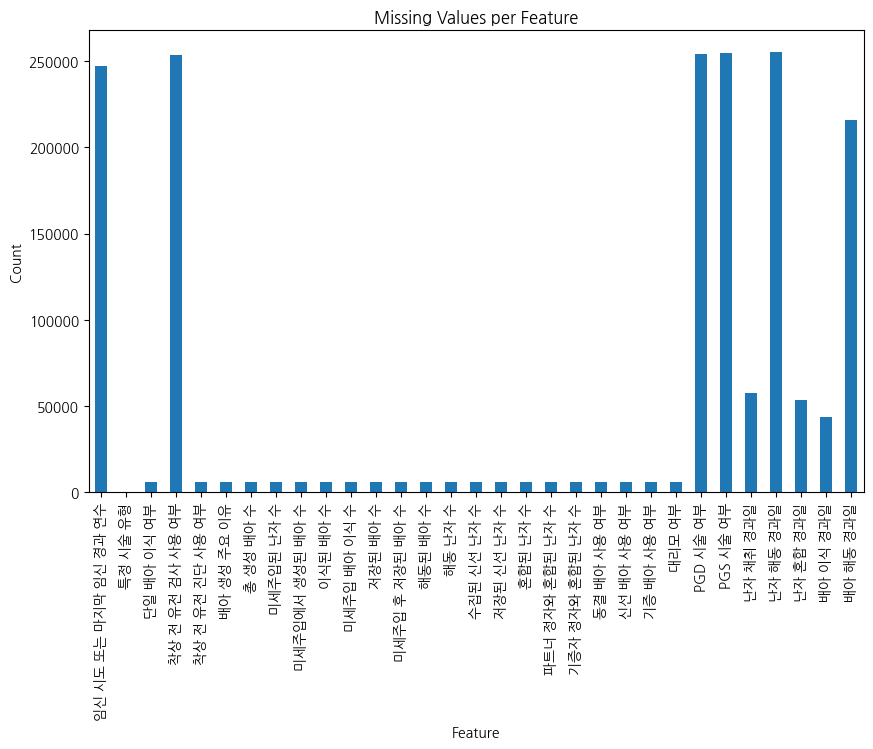

In [84]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values per Feature')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

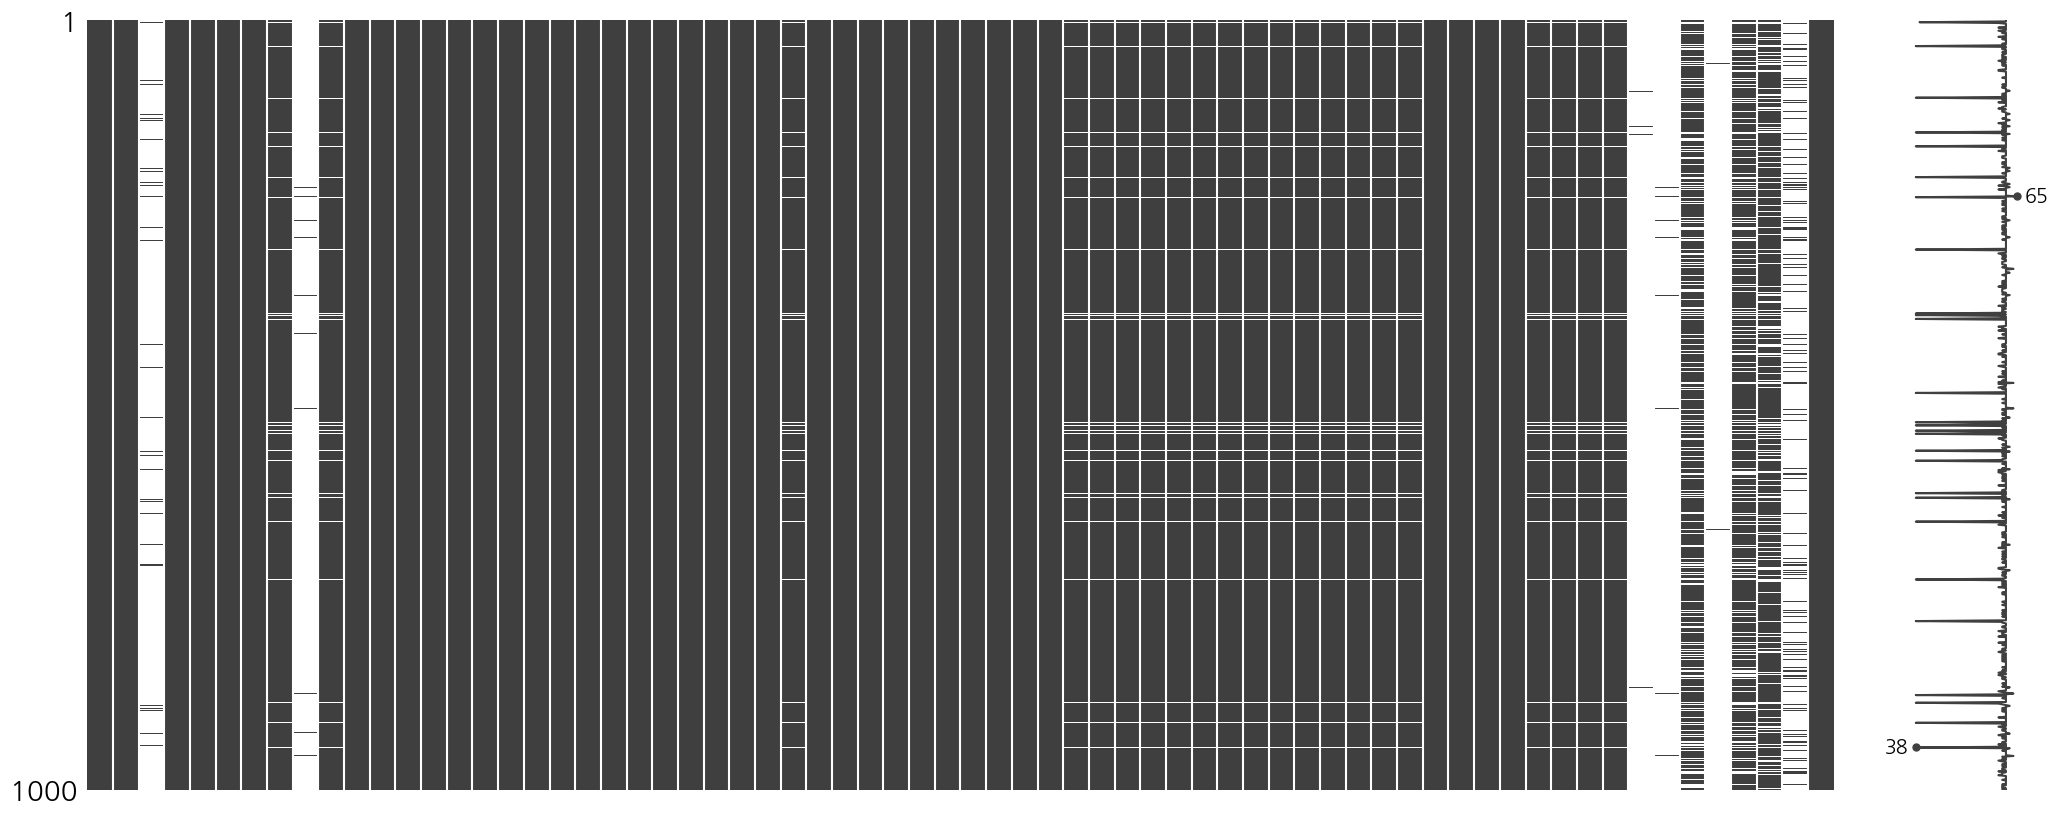

In [85]:
# Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî (heatmap)
msno.matrix(train.sample(1000))  # ÏÉòÌîå 1000Í∞úÎ°ú ÏãúÍ∞ÅÌôî
plt.show()

### 1-3. Î™©Ìëú Î≥ÄÏàò(ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä) Î∂ÑÌè¨ ÌôïÏù∏

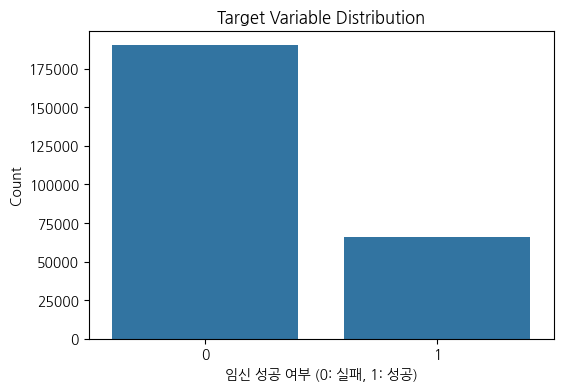

ÏûÑÏã† ÏÑ±Í≥µÎ•†:
 ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä
0    0.741651
1    0.258349
Name: proportion, dtype: float64


In [86]:
# Î™©Ìëú Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(6, 4))
sns.countplot(x=train['ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'])
plt.title('Target Variable Distribution')
plt.xlabel('ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä (0: Ïã§Ìå®, 1: ÏÑ±Í≥µ)')
plt.ylabel('Count')
plt.show()

# ÎπÑÏú® ÌôïÏù∏
success_rate = train['ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'].value_counts(normalize=True)
print("ÏûÑÏã† ÏÑ±Í≥µÎ•†:\n", success_rate)

### 1-4. ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏

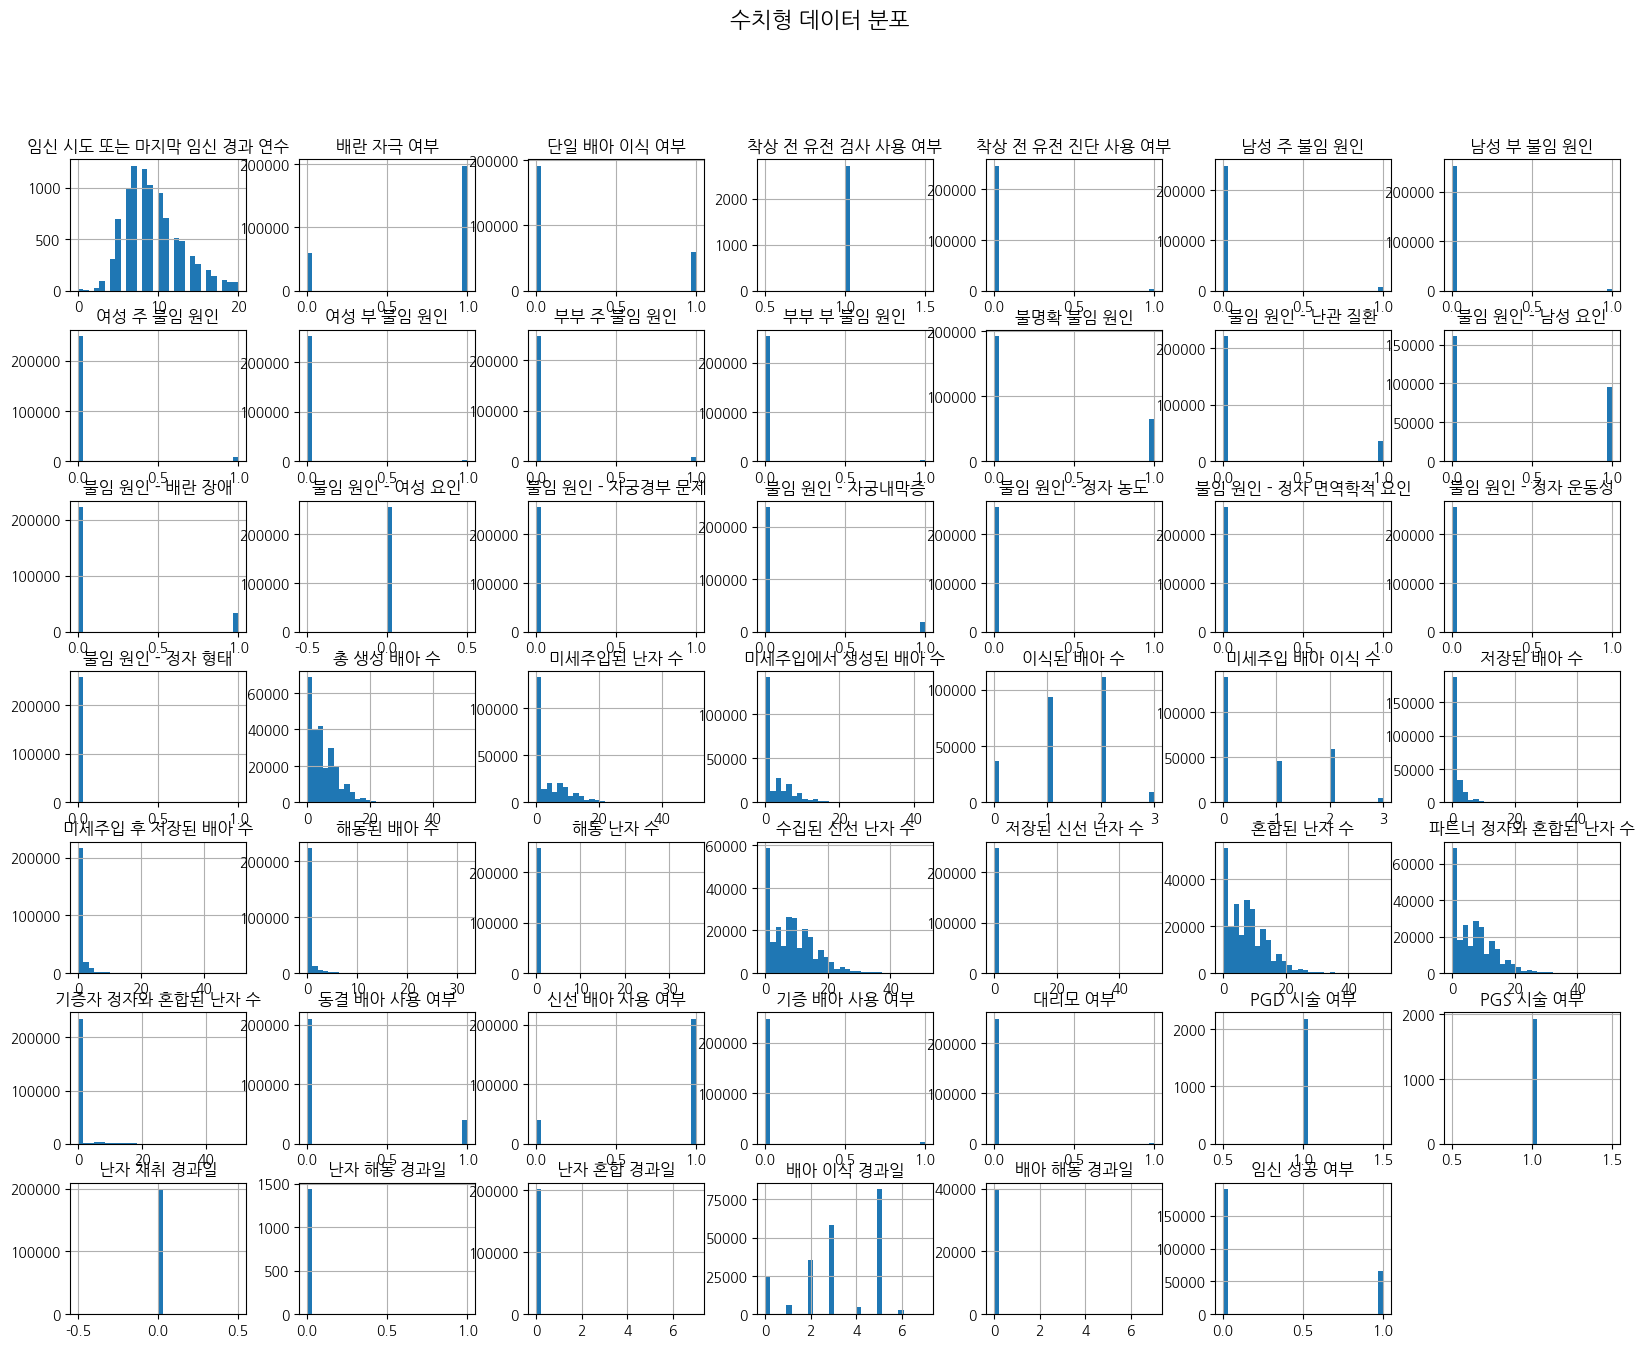

In [87]:
# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌûàÏä§ÌÜ†Í∑∏Îû®
train.hist(figsize=(20, 15), bins=30)
plt.suptitle("ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨", fontsize=16)
plt.show()

### 1-5. Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [88]:
# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_cols = train.select_dtypes(include=[np.number])

# Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = numeric_cols.corr()

# ÏÉÅÏúÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥ÄÏàò Ï∂úÎ†•
top_corr_features = corr_matrix['ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'].abs().sort_values(ascending=False)
print("ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂ÄÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ Î≥ÄÏàò:\n", top_corr_features.head(10))

ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂ÄÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ Î≥ÄÏàò:
 ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä            1.000000
Ïù¥ÏãùÎêú Î∞∞ÏïÑ Ïàò            0.157487
Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº           0.148590
Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò           0.146116
Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä         0.132635
ÌòºÌï©Îêú ÎÇúÏûê Ïàò            0.116136
ÌååÌä∏ÎÑà Ï†ïÏûêÏôÄ ÌòºÌï©Îêú ÎÇúÏûê Ïàò    0.104902
ÎØ∏ÏÑ∏Ï£ºÏûÖÏóêÏÑú ÏÉùÏÑ±Îêú Î∞∞ÏïÑ Ïàò     0.090275
ÏàòÏßëÎêú Ïã†ÏÑ† ÎÇúÏûê Ïàò         0.083023
ÎØ∏ÏÑ∏Ï£ºÏûÖ Î∞∞ÏïÑ Ïù¥Ïãù Ïàò        0.074351
Name: ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä, dtype: float64


In [139]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Î≤îÏ£ºÌòï Ïª¨Îüº Ï∞æÍ∏∞
categorical_cols = train.select_dtypes(include=['object']).columns

# Î™®Îì† Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ Label Encoding Ï†ÅÏö©
for col in categorical_cols:
    le = LabelEncoder()

    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïôÏäµ
    train[col] = le.fit_transform(train[col].astype(str))

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò (ÏÉàÎ°úÏö¥ Í∞í Ï≤òÎ¶¨)
    test[col] = test[col].astype(str)

    # ÏÉàÎ°úÏö¥ Í∞í Ï≤òÎ¶¨ Ïãú, np.where()Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏïàÏ†ÑÌïòÍ≤å Î≥ÄÌôò
    test[col] = np.where(test[col].isin(le.classes_), le.transform(test[col]), -1)

In [141]:
numeric_cols = train.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    train[col] = train[col].fillna(train[col].median())
    if col in test.columns:  # test Îç∞Ïù¥ÌÑ∞Ïóê Ìï¥Îãπ Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
        test[col] = test[col].fillna(train[col].median())  # trainÏùò Ï§ëÏïôÍ∞íÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï®

In [142]:
# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_cols = train.select_dtypes(include=[np.number])

# KeyError Î∞©ÏßÄ: 'ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'Í∞Ä train Îç∞Ïù¥ÌÑ∞Ïóê ÏûàÎäîÏßÄ ÌôïÏù∏ ÌõÑ Ïã§Ìñâ
if 'ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä' in numeric_cols.columns:
    corr_matrix = numeric_cols.corr()

    # ÏÉÅÏúÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥ÄÏàò Ï∂úÎ†•
    top_corr_features = corr_matrix['ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'].abs().sort_values(ascending=False)
    print("ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂ÄÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ Î≥ÄÏàò:\n", top_corr_features.head(10))
else:
    print("üö® 'ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä' Ïª¨ÎüºÏù¥ train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôïÏù∏ÎêòÏßÄ ÏïäÏùå")

ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂ÄÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ Î≥ÄÏàò:
 ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä            1.000000
Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº           0.261680
Ïù¥ÏãùÎêú Î∞∞ÏïÑ Ïàò            0.163030
Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò           0.150710
Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä         0.135081
ÌòºÌï©Îêú ÎÇúÏûê Ïàò            0.121826
ÌååÌä∏ÎÑà Ï†ïÏûêÏôÄ ÌòºÌï©Îêú ÎÇúÏûê Ïàò    0.110430
ÎØ∏ÏÑ∏Ï£ºÏûÖÏóêÏÑú ÏÉùÏÑ±Îêú Î∞∞ÏïÑ Ïàò     0.094071
ÏàòÏßëÎêú Ïã†ÏÑ† ÎÇúÏûê Ïàò         0.089440
ÎØ∏ÏÑ∏Ï£ºÏûÖ Î∞∞ÏïÑ Ïù¥Ïãù Ïàò        0.079051
Name: ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä, dtype: float64


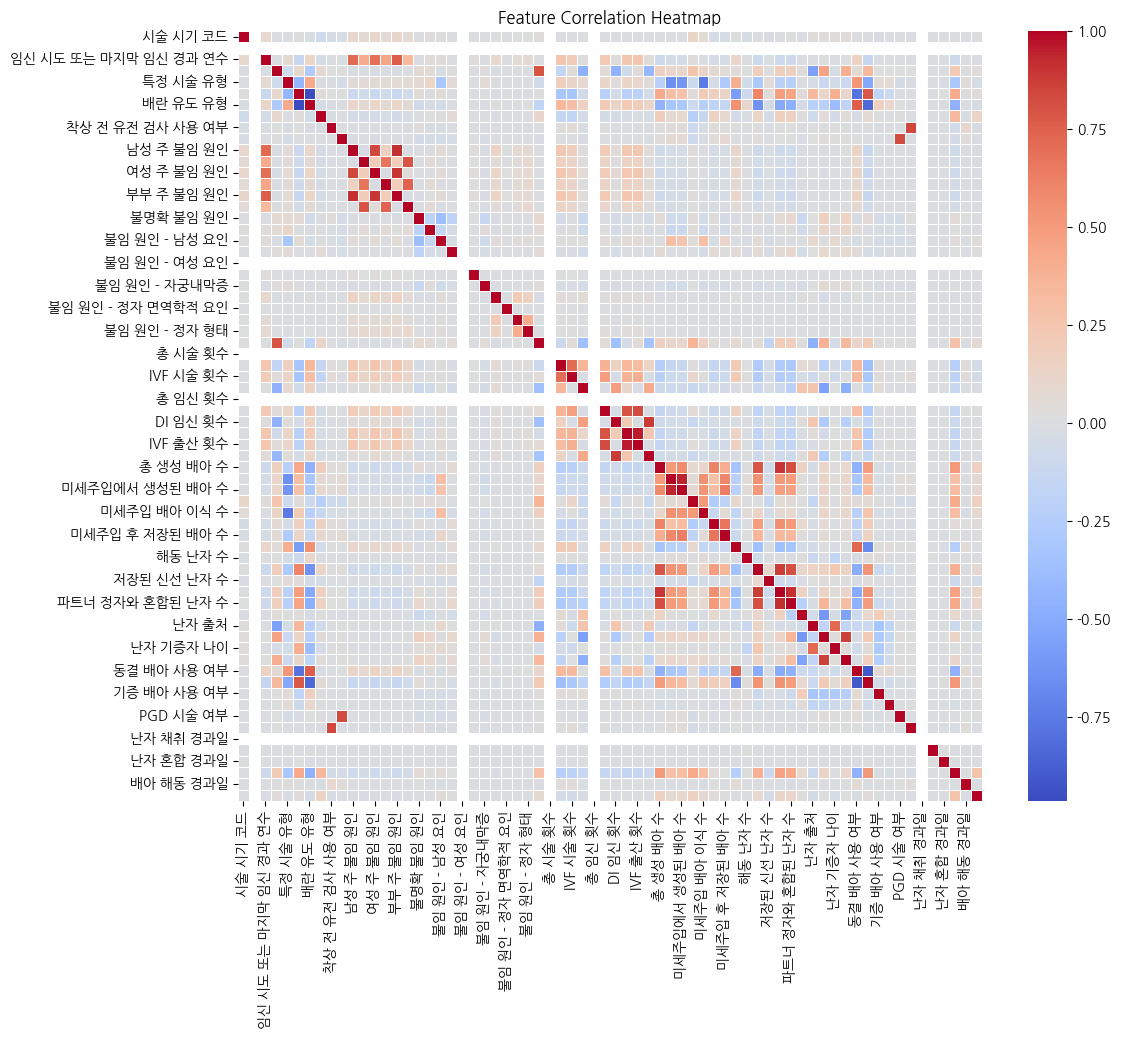

In [143]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### 1-6. Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ÎßÅ

ÏÉÅÏúÑ 10Í∞ú Ï§ëÏöî Î≥ÄÏàò:
 ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú            0.138875
ÏàòÏßëÎêú Ïã†ÏÑ† ÎÇúÏûê Ïàò         0.091030
Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò           0.081669
Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº           0.068772
IVF ÏãúÏà† ÌöüÏàò           0.060054
ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò       0.050859
ÌòºÌï©Îêú ÎÇúÏûê Ïàò            0.046506
Ïù¥ÏãùÎêú Î∞∞ÏïÑ Ïàò            0.041997
ÌååÌä∏ÎÑà Ï†ïÏûêÏôÄ ÌòºÌï©Îêú ÎÇúÏûê Ïàò    0.041839
Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò            0.041624
dtype: float64


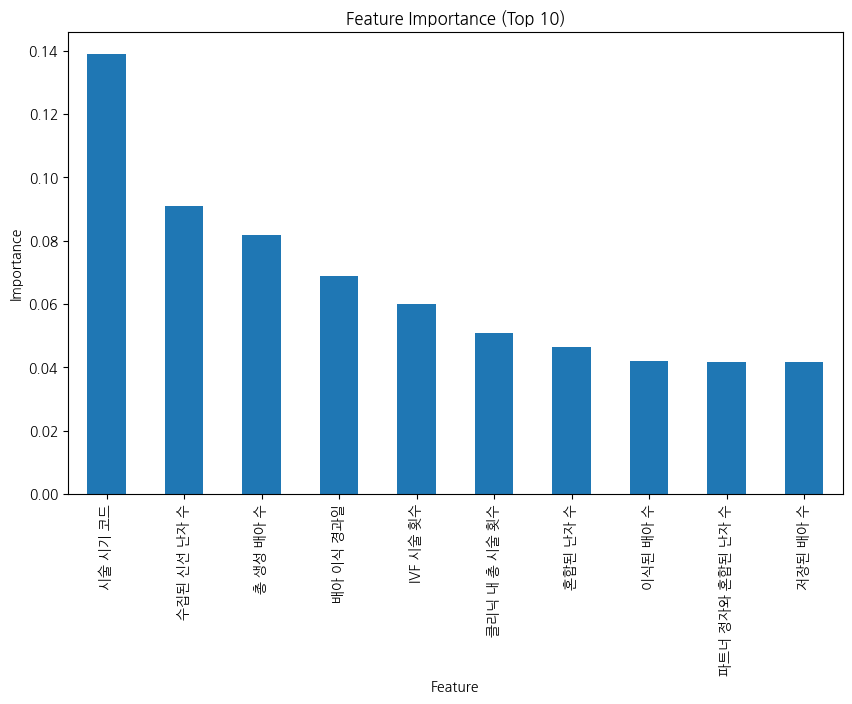

In [144]:
from sklearn.ensemble import RandomForestClassifier

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ Feature Importance Í≥ÑÏÇ∞
X_train = train.drop(columns=['ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'])  # ÏûÖÎ†• Î≥ÄÏàò
y_train = train['ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä']  # Î™©Ìëú Î≥ÄÏàò

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂úÎ†•
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# ÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò ÌôïÏù∏
print("ÏÉÅÏúÑ 10Í∞ú Ï§ëÏöî Î≥ÄÏàò:\n", feature_importances.head(10))

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title("Feature Importance (Top 10)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [145]:
from sklearn.model_selection import train_test_split

# Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ NÍ∞ú Î≥ÄÏàòÎßå ÏÇ¨Ïö©
top_n = 20  # ÏÇ¨Ïö©Ìï† ÏÉÅÏúÑ Î≥ÄÏàò Í∞úÏàò
selected_features = feature_importances.head(top_n).index.tolist()

X_train_selected = X_train[selected_features]
X_test_selected = test[selected_features]

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® 80%, Í≤ÄÏ¶ù 20%)
X_train_split, X_valid, y_train_split, y_valid = train_test_split(
    X_train_selected, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", X_train_split.shape)
print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", X_valid.shape)

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (205080, 20)
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (51271, 20)


In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Î™®Îç∏ Î¶¨Ïä§Ìä∏
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42)
}

# Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict_proba(X_valid)[:, 1]  # ÌôïÎ•† ÏòàÏ∏°

    auc = roc_auc_score(y_valid, y_pred)
    print(f"{name} Î™®Îç∏ AUC: {auc:.4f}")

RandomForest Î™®Îç∏ AUC: 0.6710


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:45:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Î™®Îç∏ AUC: 0.7149
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
LightGBM Î™®Îç∏ AUC: 0.7189


In [147]:
!pip install optuna
import optuna

# ÏµúÏ†ÅÌôîÌï† Î™®Îç∏ ÏÑ†ÌÉù (LightGBM)
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150, step=10),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100, step=10),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
    }

    model = LGBMClassifier(**params, random_state=42)
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict_proba(X_valid)[:, 1]

    return roc_auc_score(y_valid, y_pred)

# ÏµúÏ†ÅÌôî Ïã§Ìñâ
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # 20Ìöå ÏãúÎèÑ

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best hyperparameters:", study.best_params)

[I 2025-02-04 07:45:37,140] A new study created in memory with name: no-name-6ceed6f7-403d-4b1a-b8d1-112252e95e25
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree",

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:46:13,166] Trial 0 finished with value: 0.6980646280474385 and parameters: {'n_estimators': 700, 'learning_rate': 0.16744790816933752, 'num_leaves': 130, 'max_depth': 8, 'min_child_samples': 30, 'subsample': 0.9702484828218738, 'colsample_bytree': 0.5686056130418127}. Best is trial 0 with value: 0.6980646280474385.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:46:28,570] Trial 1 finished with value: 0.7169426836508916 and parameters: {'n_estimators': 300, 'learning_rate': 0.0398487252408002, 'num_leaves': 140, 'max_depth': 13, 'min_child_samples': 80, 'subsample': 0.5013456663763357, 'colsample_bytree': 0.5874074235708217}. Best is trial 1 with value: 0.7169426836508916.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:46:42,893] Trial 2 finished with value: 0.7055753290562057 and parameters: {'n_estimators': 300, 'learning_rate': 0.24808017636545754, 'num_leaves': 120, 'max_depth': 8, 'min_child_samples': 70, 'subsample': 0.6670137463105499, 'colsample_bytree': 0.5744396137924752}. Best is trial 1 with value: 0.7169426836508916.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2025-02-04 07:47:04,555] Trial 3 finished with value: 0.7174825759613039 and parameters: {'n_estimators': 600, 'learning_rate': 0.04265727406893605, 'num_leaves': 60, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.6232972896480835, 'colsample_bytree': 0.7646402971233484}. Best is trial 3 with value: 0.7174825759613039.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573


[I 2025-02-04 07:47:15,562] Trial 4 finished with value: 0.7193278598091661 and parameters: {'n_estimators': 200, 'learning_rate': 0.012238984988620838, 'num_leaves': 120, 'max_depth': 10, 'min_child_samples': 50, 'subsample': 0.571943768949083, 'colsample_bytree': 0.7402445988194329}. Best is trial 4 with value: 0.7193278598091661.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:47:40,318] Trial 5 finished with value: 0.7151937667064439 and parameters: {'n_estimators': 600, 'learning_rate': 0.027552138427298725, 'num_leaves': 110, 'max_depth': 14, 'min_child_samples': 80, 'subsample': 0.7384458866018839, 'colsample_bytree': 0.8849804715573923}. Best is trial 4 with value: 0.7193278598091661.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573


[I 2025-02-04 07:47:55,338] Trial 6 finished with value: 0.7197540070896324 and parameters: {'n_estimators': 400, 'learning_rate': 0.018172745732271605, 'num_leaves': 30, 'max_depth': 15, 'min_child_samples': 100, 'subsample': 0.9526244857767474, 'colsample_bytree': 0.7187069245885009}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573


[I 2025-02-04 07:48:23,014] Trial 7 finished with value: 0.7173712302762583 and parameters: {'n_estimators': 1000, 'learning_rate': 0.031826677741868474, 'num_leaves': 30, 'max_depth': 11, 'min_child_samples': 90, 'subsample': 0.9222440206624185, 'colsample_bytree': 0.787233691430842}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573


[I 2025-02-04 07:48:28,709] Trial 8 finished with value: 0.7179089247589463 and parameters: {'n_estimators': 200, 'learning_rate': 0.12196319591776354, 'num_leaves': 30, 'max_depth': 8, 'min_child_samples': 10, 'subsample': 0.638615493541693, 'colsample_bytree': 0.7391446954525047}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform h

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:49:09,446] Trial 9 finished with value: 0.7161966809624738 and parameters: {'n_estimators': 1000, 'learning_rate': 0.03053504694089757, 'num_leaves': 60, 'max_depth': 13, 'min_child_samples': 70, 'subsample': 0.5197386573130551, 'colsample_bytree': 0.5996846249422891}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:49:19,868] Trial 10 finished with value: 0.7157613095558948 and parameters: {'n_estimators': 400, 'learning_rate': 0.011444551851133194, 'num_leaves': 80, 'max_depth': 3, 'min_child_samples': 100, 'subsample': 0.8679390516065397, 'colsample_bytree': 0.9820116851070411}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573


[I 2025-02-04 07:49:24,785] Trial 11 finished with value: 0.7192069763062456 and parameters: {'n_estimators': 100, 'learning_rate': 0.015495282130958061, 'num_leaves': 80, 'max_depth': 15, 'min_child_samples': 50, 'subsample': 0.839368109278267, 'colsample_bytree': 0.6753887272100396}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:49:43,885] Trial 12 finished with value: 0.7176185970771274 and parameters: {'n_estimators': 400, 'learning_rate': 0.01581952124589142, 'num_leaves': 150, 'max_depth': 11, 'min_child_samples': 50, 'subsample': 0.7789548169201992, 'colsample_bytree': 0.8569587436703568}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573


[I 2025-02-04 07:49:49,865] Trial 13 finished with value: 0.7184045597281523 and parameters: {'n_estimators': 100, 'learning_rate': 0.0740442524492436, 'num_leaves': 100, 'max_depth': 10, 'min_child_samples': 40, 'subsample': 0.9937464711960815, 'colsample_bytree': 0.677019309268208}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573


[I 2025-02-04 07:50:15,907] Trial 14 finished with value: 0.7194271134709468 and parameters: {'n_estimators': 800, 'learning_rate': 0.010034409009340124, 'num_leaves': 20, 'max_depth': 5, 'min_child_samples': 60, 'subsample': 0.5858171721225065, 'colsample_bytree': 0.6820658205579663}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:50:49,587] Trial 15 finished with value: 0.7195528095614043 and parameters: {'n_estimators': 800, 'learning_rate': 0.02058075099019714, 'num_leaves': 20, 'max_depth': 4, 'min_child_samples': 100, 'subsample': 0.7194533657444052, 'colsample_bytree': 0.5136275571922211}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:51:19,589] Trial 16 finished with value: 0.7190730190042609 and parameters: {'n_estimators': 800, 'learning_rate': 0.021451163876074677, 'num_leaves': 50, 'max_depth': 3, 'min_child_samples': 100, 'subsample': 0.7198737169251785, 'colsample_bytree': 0.506775538735142}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:51:40,794] Trial 17 finished with value: 0.7186071797889588 and parameters: {'n_estimators': 500, 'learning_rate': 0.058576870729175994, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 90, 'subsample': 0.8273553928265436, 'colsample_bytree': 0.5131498344718805}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_unifor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:52:05,376] Trial 18 finished with value: 0.7192921892835945 and parameters: {'n_estimators': 800, 'learning_rate': 0.01811386297776694, 'num_leaves': 20, 'max_depth': 6, 'min_child_samples': 100, 'subsample': 0.9153283322983436, 'colsample_bytree': 0.850170324668627}. Best is trial 6 with value: 0.7197540070896324.
<ipython-input-147-22c47782c1a6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-147-22c47782c1a6>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-147-22c47782c1a6>:13: FutureWarning: suggest_uniform

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-04 07:52:32,875] Trial 19 finished with value: 0.7089432191108169 and parameters: {'n_estimators': 900, 'learning_rate': 0.0803235113059611, 'num_leaves': 60, 'max_depth': 12, 'min_child_samples': 90, 'subsample': 0.7748705490859572, 'colsample_bytree': 0.9942479922503327}. Best is trial 6 with value: 0.7197540070896324.


Best hyperparameters: {'n_estimators': 400, 'learning_rate': 0.018172745732271605, 'num_leaves': 30, 'max_depth': 15, 'min_child_samples': 100, 'subsample': 0.9526244857767474, 'colsample_bytree': 0.7187069245885009}


In [148]:
# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©
best_params = study.best_params
final_model = LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_train_selected, y_train)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_predictions = final_model.predict_proba(X_test_selected)[:, 1]

# Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.read_csv('./sample_submission.csv')
submission['probability'] = test_predictions
submission.to_csv('submission.csv', index=False)

print("‚úÖ ÏµúÏ¢Ö Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å: submission.csv")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 66228, number of negative: 190123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.189972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 256351, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258349 -> initscore=-1.054568
[LightGBM] [Info] Start training from score -1.054568
‚úÖ ÏµúÏ¢Ö Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å: submission.csv




---

